## Recommendation based on Popularity Ratings:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("D:/4th_SEMESTER/5._DMT/J-Comp/electronics_data_2.csv")

In [3]:
data.head(10)

,reviewerID,asin,reviewText,rating,summary,reviewTime,helpful_rev,not_helpful_rev,rating_class,helpful_rev_ratio,rev_year,rev_month
0,AO94DHGC771SJ,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,2013-06-02,0,0,good,0.000000,2013,6
1,AMO214LNFCEI4,0528881469,"I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,2010-11-25,12,3,bad,0.800000,2010,11
2,A3N7T0DY83Y4IG,0528881469,"Well, what can I say. I've had this unit in m...",3.0,1st impression,2010-09-09,43,2,bad,0.955556,2010,9
3,A1H8PY3QHMQQA0,0528881469,"Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",2010-11-24,9,1,bad,0.900000,2010,11
4,A24EV6RXELQZ63,0528881469,I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",2011-09-29,0,0,bad,0.000000,2011,9
5,A2JXAZZI9PHK9Z,0594451647,I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,2014-01-03,3,0,good,1.000000,2014,1
6,A2P5U7BDKKT7FW,0594451647,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,2014-04-27,0,0,bad,0.000000,2014,4
7,AAZ084UMH8VZ2,0594451647,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,2014-05-04,0,0,good,0.000000,2014,5
8,AEZ3CR6BKIROJ,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,2014-07-11,0,0,good,0.000000,2014,7
9,A3BY5KCNQZXV5U,0594451647,This product really works great but I found th...,5.0,This works great but read the details...,2014-01-20,3,0,good,1.000000,2014,1


In [4]:
data.drop(["reviewText", "summary", "reviewTime", "helpful_rev",	"not_helpful_rev", "rating_class", "helpful_rev_ratio",	"rev_year",	"rev_month"], inplace = True, axis = 1)

In [5]:
data.head(5)

,reviewerID,asin,rating
0,AO94DHGC771SJ,0528881469,5.0
1,AMO214LNFCEI4,0528881469,1.0
2,A3N7T0DY83Y4IG,0528881469,3.0
3,A1H8PY3QHMQQA0,0528881469,2.0
4,A24EV6RXELQZ63,0528881469,1.0


### Calculating weighted average rating of each product

**weighted_avg = ( v / (v + m) ⋅ R ) + ( m / ( v + m ) ⋅ C )**

* v is the number of votes for the movie
* m is the minimum votes required to be listed in the chart
* R is the average rating of the movie
* C is the mean rating across the whole report

In [6]:
data2 = data.groupby(["asin","rating"]).count()
data2.reset_index(drop = False, inplace = True)

In [7]:
data2.head(2)

,asin,rating,reviewerID
0,0528881469,1.0,2
1,0528881469,2.0,1


In [8]:
data2["rating*pernumOfvote"] = data2["reviewerID"] * data2["rating"]
data2.head(2)

,asin,rating,reviewerID,rating*pernumOfvote
0,0528881469,1.0,2,2.0
1,0528881469,2.0,1,2.0


In [9]:
rating_pernumOfvote = pd.Series(data2.groupby("asin")["rating*pernumOfvote"].sum())
data3 = data.groupby(["asin"]).count()
totalNumVotesPerProduct = data3["rating"]
data3["avg_rating"] = rating_pernumOfvote / totalNumVotesPerProduct

In [10]:
R = data3["avg_rating"] 
v = data3["rating"]
m = data3["rating"].quantile(0.95)
C = data["rating"].mean()

def weighted_avg(v,R,C, m):
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
data3["weighted_avg"] = weighted_avg(v,R,C, m)
data3.sort_values(by = ["weighted_avg"], ascending=False, inplace = True)
data3.rename(columns = {"reviewerID" : "total_rating_given"}, inplace = True)
data3.drop(["rating", "avg_rating"] , axis = 1, inplace = True)
data3.reset_index(drop = False, inplace = True)

In [12]:
top_20 = data3.head(20)

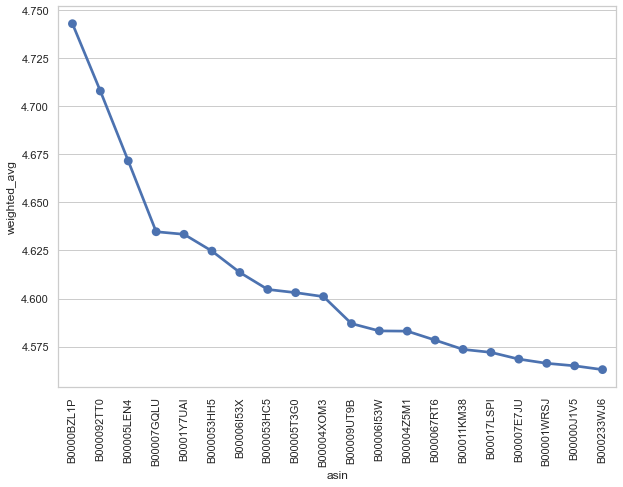

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.set_theme(style = "whitegrid")
ax = sns.pointplot(x = "asin", y = "weighted_avg", data = top_20)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()